Decision Tree Classifier


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree


In [2]:
#load dataset
df= pd.read_csv('Renewable_Energy_Adoption.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [4]:
#feature selection
X= df.drop('adoption', axis=1)
y= df['adoption']

In [7]:
#splitting the data set into training aand testing sets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
#inirialise the model with a specified max depth to prevent overfitting.
model=DecisionTreeClassifier(max_depth=3, random_state=42)
#train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred =model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [10]:
#metrics
#Accuracy score
acc= accuracy_score(y_test,y_pred)
print(f'Accuracy Score is {acc}')

Accuracy Score is 0.85


In [11]:
#confusion matrix 
cm= confusion_matrix(y_test,y_pred)
cm

array([[16,  1],
       [ 2,  1]], dtype=int64)

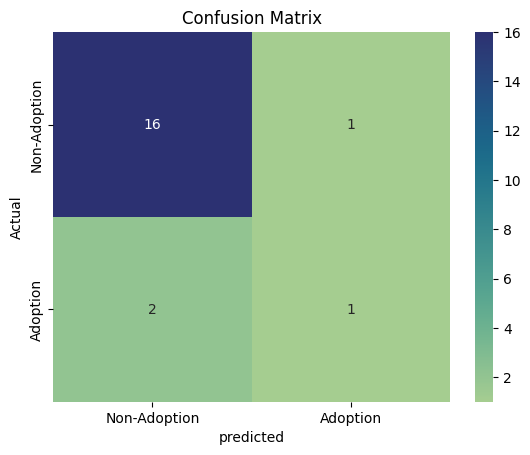

In [12]:
sns.heatmap(cm ,annot=True,fmt='d',cmap='crest',
            xticklabels=['Non-Adoption','Adoption'],
            yticklabels=['Non-Adoption','Adoption'])
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
#Classification Report
print(classification_report(y_test,y_pred,target_names=['Non Adoption','Adoption']))

              precision    recall  f1-score   support

Non Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



In [16]:
import joblib
joblib.dump(model, 'DTC_REAdoption.pkl')

['DTC_REAdoption.pkl']

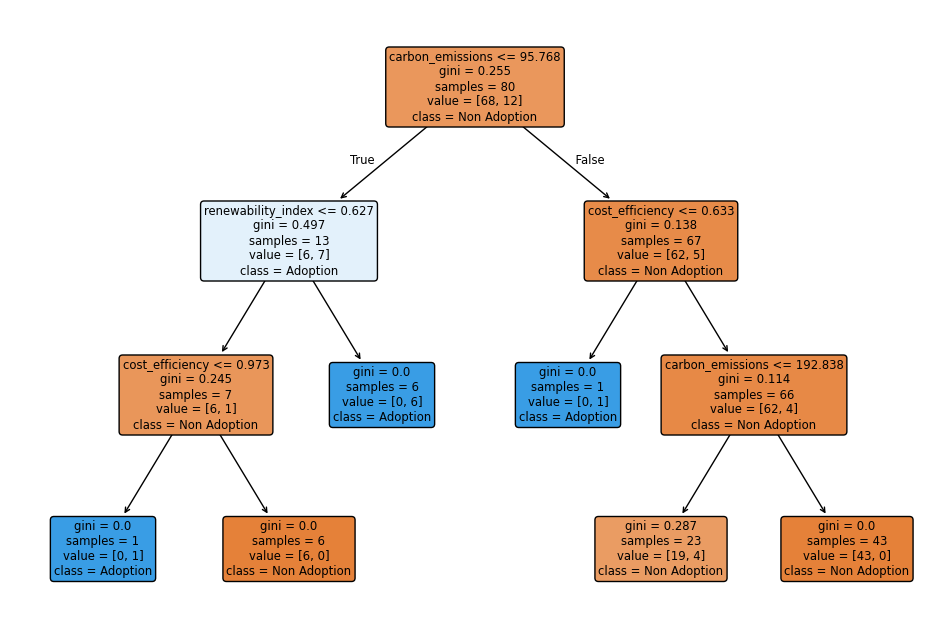

In [17]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns,class_names=['Non Adoption','Adoption'],
          filled=True,rounded=True)
#plt.savefig('dtc.png')
plt.show()